<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/Mobile%26Nas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [ ]:

# train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
# test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [ ]:

train_directory = '/content/gdrive/MyDrive/Dataset/Training'
test_directory = '/content/gdrive/MyDrive/Dataset/Testing'

In [ ]:
image_size = (224, 224)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [ ]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [ ]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [ ]:
from keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
from keras.utils import to_categorical

In [ ]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [ ]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5712, 224, 224, 3)
y_train shape: (5712,)
X_test shape: (1311, 224, 224, 3)
y_test shape: (1311,)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:

num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                  

In [ ]:
# # compile the model to use categorical cross-entropy loss function and adadelta optimizer
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=1,
#                     validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





Epoch 1/50
90/90 [==============================] - 20s 140ms/step - loss: 4.8292 - accuracy: 0.4779 - val_loss: 0.9567 - val_accuracy: 0.6140
Epoch 2/50
90/90 [==============================] - 11s 119ms/step - loss: 0.7117 - accuracy: 0.7197 - val_loss: 0.5943 - val_accuracy: 0.7712
Epoch 3/50
90/90 [==============================] - 11s 119ms/step - loss: 0.5256 - accuracy: 0.8074 - val_loss: 0.5041 - val_accuracy: 0.8085
Epoch 4/50
90/90 [==============================] - 11s 119ms/step - loss: 0.4003 - accuracy: 0.8514 - val_loss: 0.4021 - val_accuracy: 0.8421
Epoch 5/50
90/90 [==============================] - 11s 122ms/step - loss: 0.3398 - accuracy: 0.8769 - val_loss: 0.3372 - val_accuracy: 0.8741
Epoch 6/50
90/90 [==============================] - 11s 119ms/step - loss: 0.2837 - accuracy: 0.8981 - val_loss: 0.2861 - val_accuracy: 0.8932
Epoch 7/50
90/90 [==============================] - 11s 120ms/step - loss: 0.2815 - accuracy: 0.8943 - val_loss: 0.2440 - val_accuracy: 0.9176

In [ ]:
predictions = model.predict(X_test)

41/41 [==============================] - 1s 8ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.12765999138355255
Test accuracy: 0.952707827091217


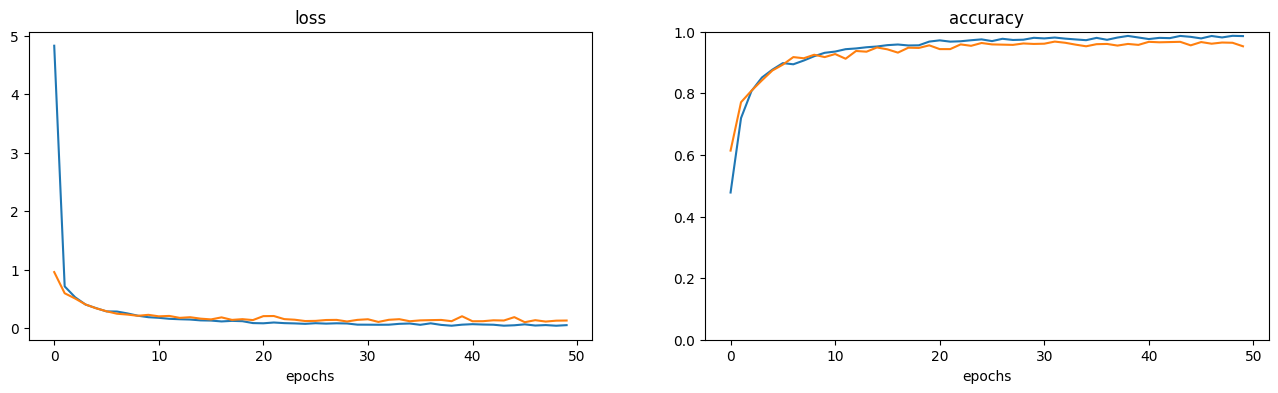

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:

# Assuming you have trained the model and have test data X_test, test_encoded_labels
predictions = model.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)


In [ ]:

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       300
           1       0.92      0.89      0.90       306
           2       0.98      1.00      0.99       405
           3       0.99      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



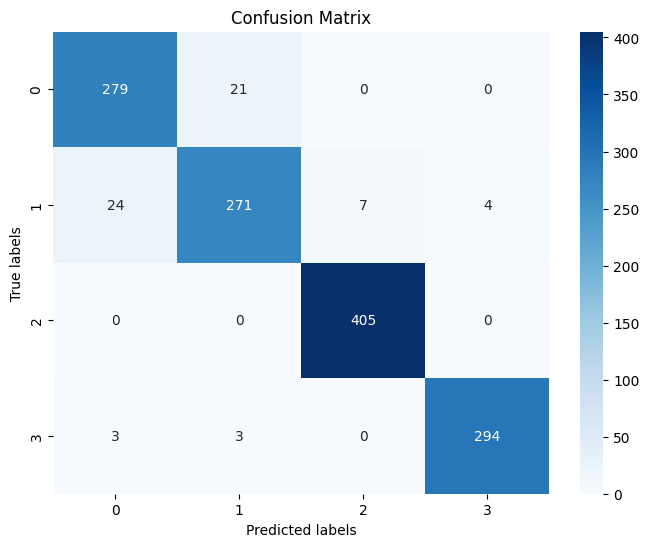

In [ ]:



# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Mob = MobileNetV2(weights='imagenet', include_top=True)
Mob.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [ ]:
# make a reference to MobileNets's input layer
inp = Mob.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in MobileNets, and make a reference to it
out = new_classification_layer(Mob.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'predictions' contains the predicted labels (output from the model)
# Replace this with your actual predictions from the model
predictions = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_encoded_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input


In [ ]:


X_train_mobilenet = preprocess_input(X_train)
X_test_mobilenet = preprocess_input(X_test)


In [ ]:
history2 = model_new.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))


Epoch 1/50
90/90 [==============================] - 24s 188ms/step - loss: 0.7419 - accuracy: 0.7127 - val_loss: 0.6649 - val_accuracy: 0.7521
Epoch 2/50
90/90 [==============================] - 10s 109ms/step - loss: 0.4419 - accuracy: 0.8511 - val_loss: 0.5142 - val_accuracy: 0.8070
Epoch 3/50
90/90 [==============================] - 8s 87ms/step - loss: 0.3717 - accuracy: 0.8735 - val_loss: 0.4466 - val_accuracy: 0.8337
Epoch 4/50
90/90 [==============================] - 8s 88ms/step - loss: 0.3311 - accuracy: 0.8908 - val_loss: 0.4171 - val_accuracy: 0.8421
Epoch 5/50
90/90 [==============================] - 9s 104ms/step - loss: 0.3068 - accuracy: 0.8993 - val_loss: 0.4060 - val_accuracy: 0.8459
Epoch 6/50
90/90 [==============================] - 9s 99ms/step - loss: 0.2862 - accuracy: 0.9044 - val_loss: 0.3715 - val_accuracy: 0.8635
Epoch 7/50
90/90 [==============================] - 9s 102ms/step - loss: 0.2713 - accuracy: 0.9067 - val_loss: 0.3625 - val_accuracy: 0.8711
Epoch 8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:


predictions = model_new.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 3s 33ms/step


In [ ]:

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       300
           1       0.83      0.82      0.82       306
           2       0.95      1.00      0.97       405
           3       0.95      0.98      0.97       300

    accuracy                           0.92      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311



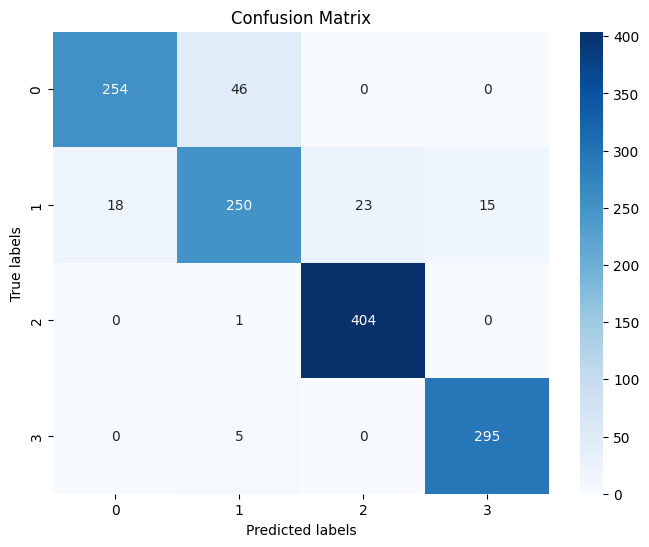

In [ ]:



# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


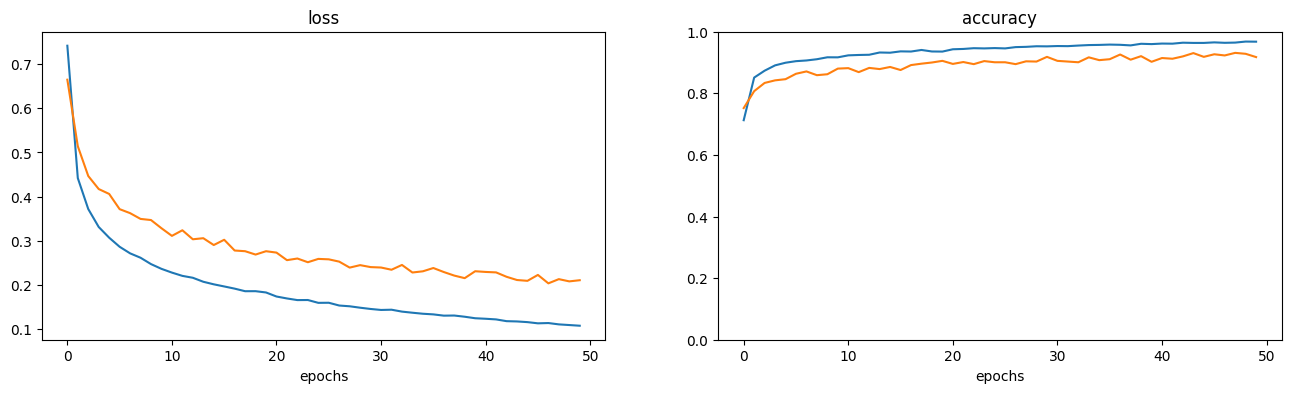

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history2.history["loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history2.history["accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.21041376888751984
Test accuracy: 0.9176201224327087


In [ ]:
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.nasnet import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

nas = NASNetMobile(weights='imagenet', include_top=True)
nas.summary()

24227760/24227760 [==============================] - 0s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_12 (Activation) 

In [ ]:
# make a reference to VGG's input layer
inp = nas.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(nas.layers[-2].output)

# create a new network between inp and out
model_nas = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_nas.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_nas.layers[-1:]):
    layer.trainable = True

model_nas.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_nas.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_12 (Activation)  (None, 111, 111, 32)         0         ['stem_bn1[0][0]']      

In [ ]:
history3 = model_nas.fit(X_train,to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
90/90 [==============================] - 53s 250ms/step - loss: 1.2857 - accuracy: 0.4900 - val_loss: 1.0398 - val_accuracy: 0.5736
Epoch 2/50
90/90 [==============================] - 13s 145ms/step - loss: 0.9176 - accuracy: 0.6368 - val_loss: 0.9257 - val_accuracy: 0.6537
Epoch 3/50
90/90 [==============================] - 13s 145ms/step - loss: 0.8319 - accuracy: 0.6900 - val_loss: 0.8715 - val_accuracy: 0.6659
Epoch 4/50
90/90 [==============================] - 14s 159ms/step - loss: 0.7786 - accuracy: 0.7160 - val_loss: 0.8361 - val_accuracy: 0.6857
Epoch 5/50
90/90 [==============================] - 13s 144ms/step - loss: 0.7454 - accuracy: 0.7288 - val_loss: 0.8096 - val_accuracy: 0.6865
Epoch 6/50
90/90 [==============================] - 14s 151ms/step - loss: 0.7167 - accuracy: 0.7379 - val_loss: 0.8093 - val_accuracy: 0.6873
Epoch 7/50
90/90 [==============================] - 14s 158ms/step - loss: 0.6963 - accuracy: 0.7501 - val_loss: 0.7752 - val_accuracy: 0.7018

In [ ]:
loss, accuracy = model_nas.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.59694904088974
Test accuracy: 0.7772692441940308


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:
predictions = model_nas.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 8s 58ms/step


In [ ]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       300
           1       0.70      0.54      0.61       306
           2       0.87      0.88      0.88       405
           3       0.77      0.91      0.83       300

    accuracy                           0.78      1311
   macro avg       0.77      0.77      0.76      1311
weighted avg       0.77      0.78      0.77      1311



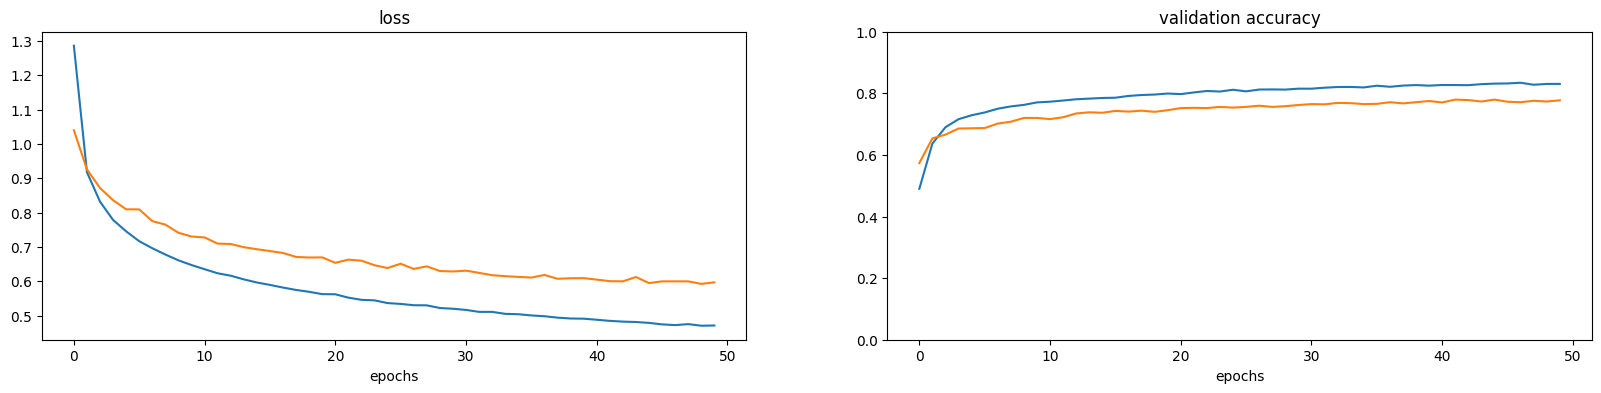

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history3.history["loss"])
ax.plot(history3.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history3.history["accuracy"])
ax2.plot(history3.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

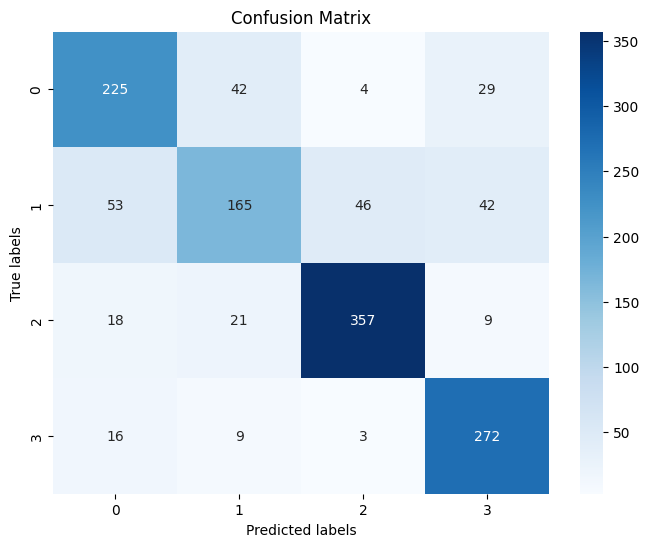

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()